# Python performance problems

# suppose we execute this code in C++

```
long j, total;

total = 0;
j = 300;

for(; j<1000; j++)
    total += j;

the C compilier will reserve two 8 byte chunks of memory 
to hold the current values
of total and j. 

after 1st loop

    j: 300
    total: 300
    
after 2nd loop

    j: 301
    total: 601
```

- in each time around the loop, the values of j and total will be updated in their reserved memory chunks. their previous values will be lost.
- the C++ complier will perform complex transformations of the code, to run efficiently on the CPU.

# Python version of loop
- there is NO dedicated memory for storing the 
values of j and total. 
- j and total just point to objects in the heap.

```
total = 0
for j in range(300, 1000):
    total += j
    
 
after 1st loop(heap object on right:

    j -> 300
    total -> 300

    after 2nd loop

    j -> 301
    total -> 601
      -> 300   # nothing is pointing to 300
      
    after 3rd loop
    j -> 302
    total -> 903
      -> 301
      -> 601
```

- each time around the loop, we create two new int objects, and 
throw two int objects away! way more work than C++ is doing! 
- in general interpreters are much slower than complied code
- some versions of Python might try to optimize this expression


# Boxed and Unboxed Data
- 'unboxed' refers to the the data itself
- 'long x;' in C++ reserves 8 bytes for x
    - no overhead or 'boxing'
- 'boxed' refers to all the memory associated with an object
- an int in Python is an OBJECT.
- a '500' int object has other fields aside from the '500' value
    - namespace dict 
    - type info 
    - reference count
- very substantial memory overhead
    - Python int object uses 28 bytes(the int proper is only 8 bytes)!
- "everything is an object"
    - elegant, simple, and expensive

# three element int array in C++
- the three ints are consecutive in memory
- there is no boxing overhead - only 24 bytes are used



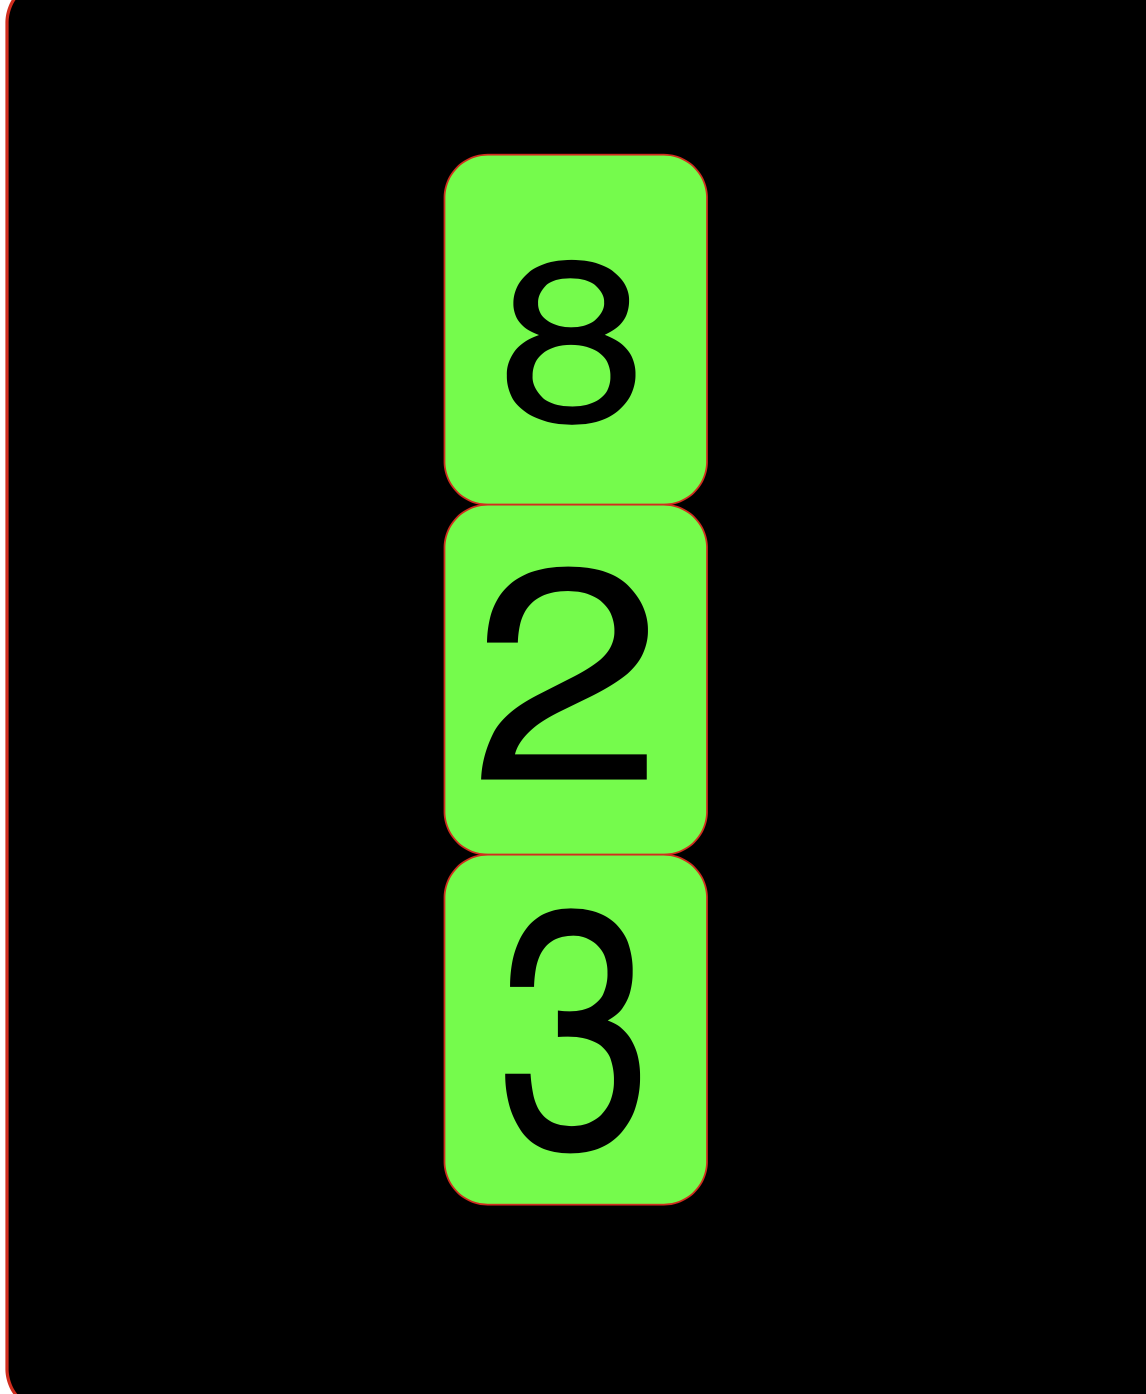


# no arrays in Python, must use a list 
- list holds 3 references to 3 int objects
- objects usually get allocated randomly in memory. 
    - the int objects won't be contiguous
- list uses extra memory

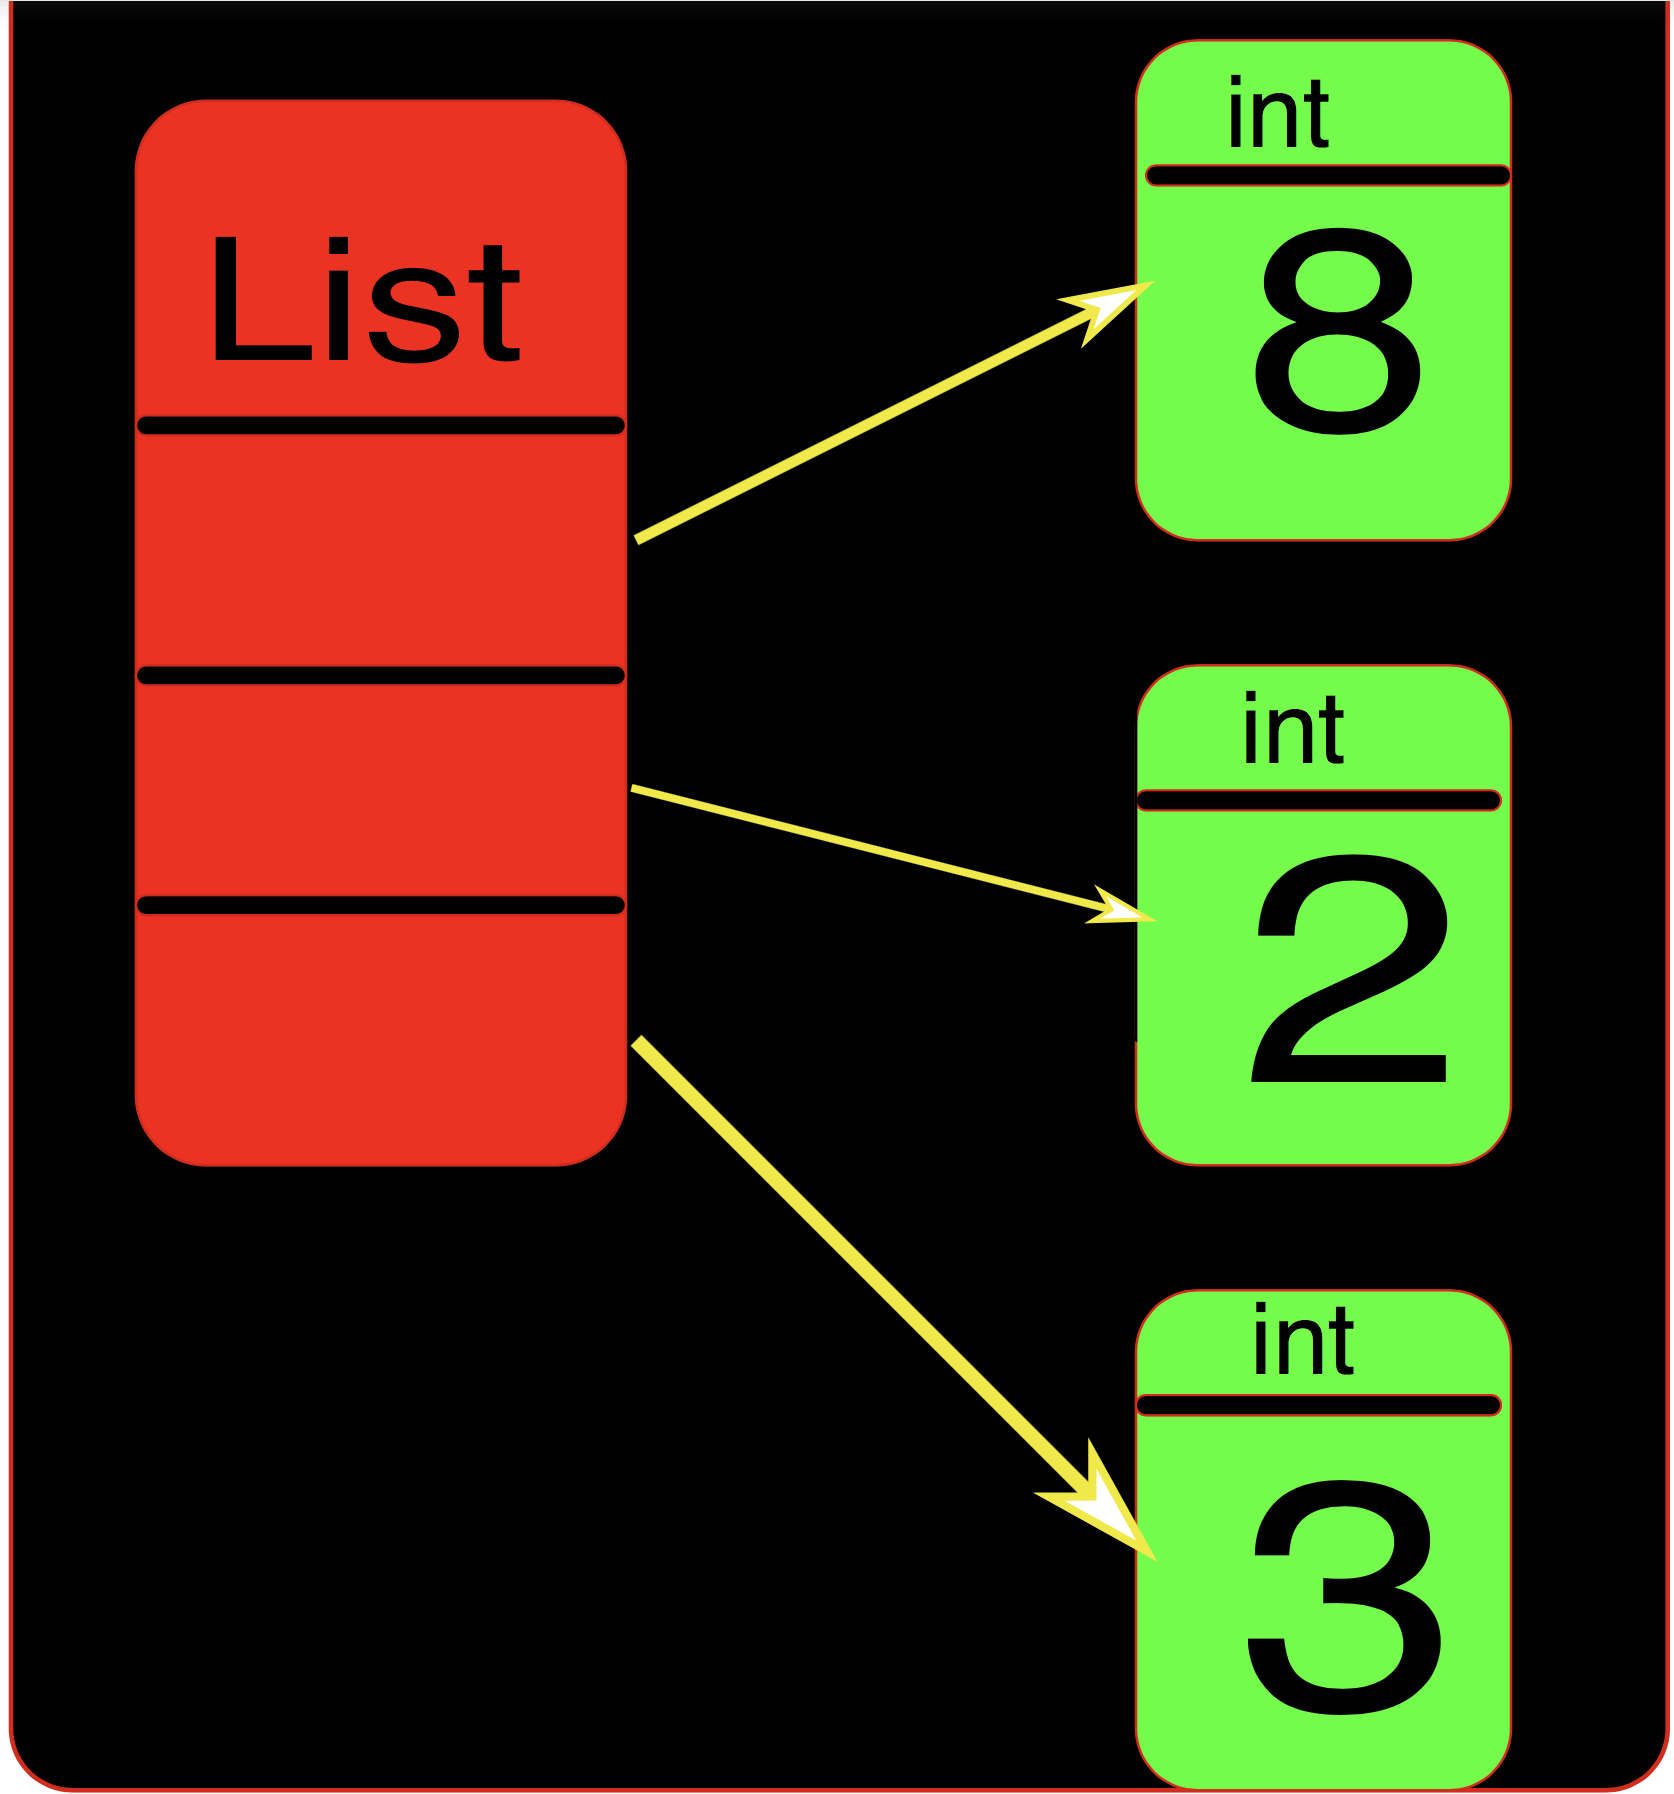

In [2]:
import sys

# tells you how many bytes an object is using
# why are ints more expensive than floats?

sys.getsizeof(500), sys.getsizeof(34.4)

(28, 24)

In [3]:
# str object - 49 bytes of overhead!

s = ''

for j in range(1,30):
    s += 'c'
    print(j, sys.getsizeof(s))


1 50
2 51
3 52
4 53
5 54
6 55
7 56
8 57
9 58
10 59
11 60
12 61
13 62
14 63
15 64
16 65
17 66
18 67
19 68
20 69
21 70
22 71
23 72
24 73
25 74
26 75
27 76
28 77
29 78


In [4]:
# what is happening with the list?
# if you know how big your data is, 
# better to preallocate the full list

lst = []

for j in range(1,30):
    print(j, sys.getsizeof(lst))
    lst.append(1)



1 72
2 104
3 104
4 104
5 104
6 136
7 136
8 136
9 136
10 200
11 200
12 200
13 200
14 200
15 200
16 200
17 200
18 272
19 272
20 272
21 272
22 272
23 272
24 272
25 272
26 272
27 352
28 352
29 352


# C code is complied, Python interpreted
- C compiliers generate highly optimized code for the CPU
- Python interpreter is much slower

# current computers(non quantum) basically use the [von neumann model](https://en.wikipedia.org/wiki/Von_Neumann_architecture)
- memory and CPU speed very unbalanced

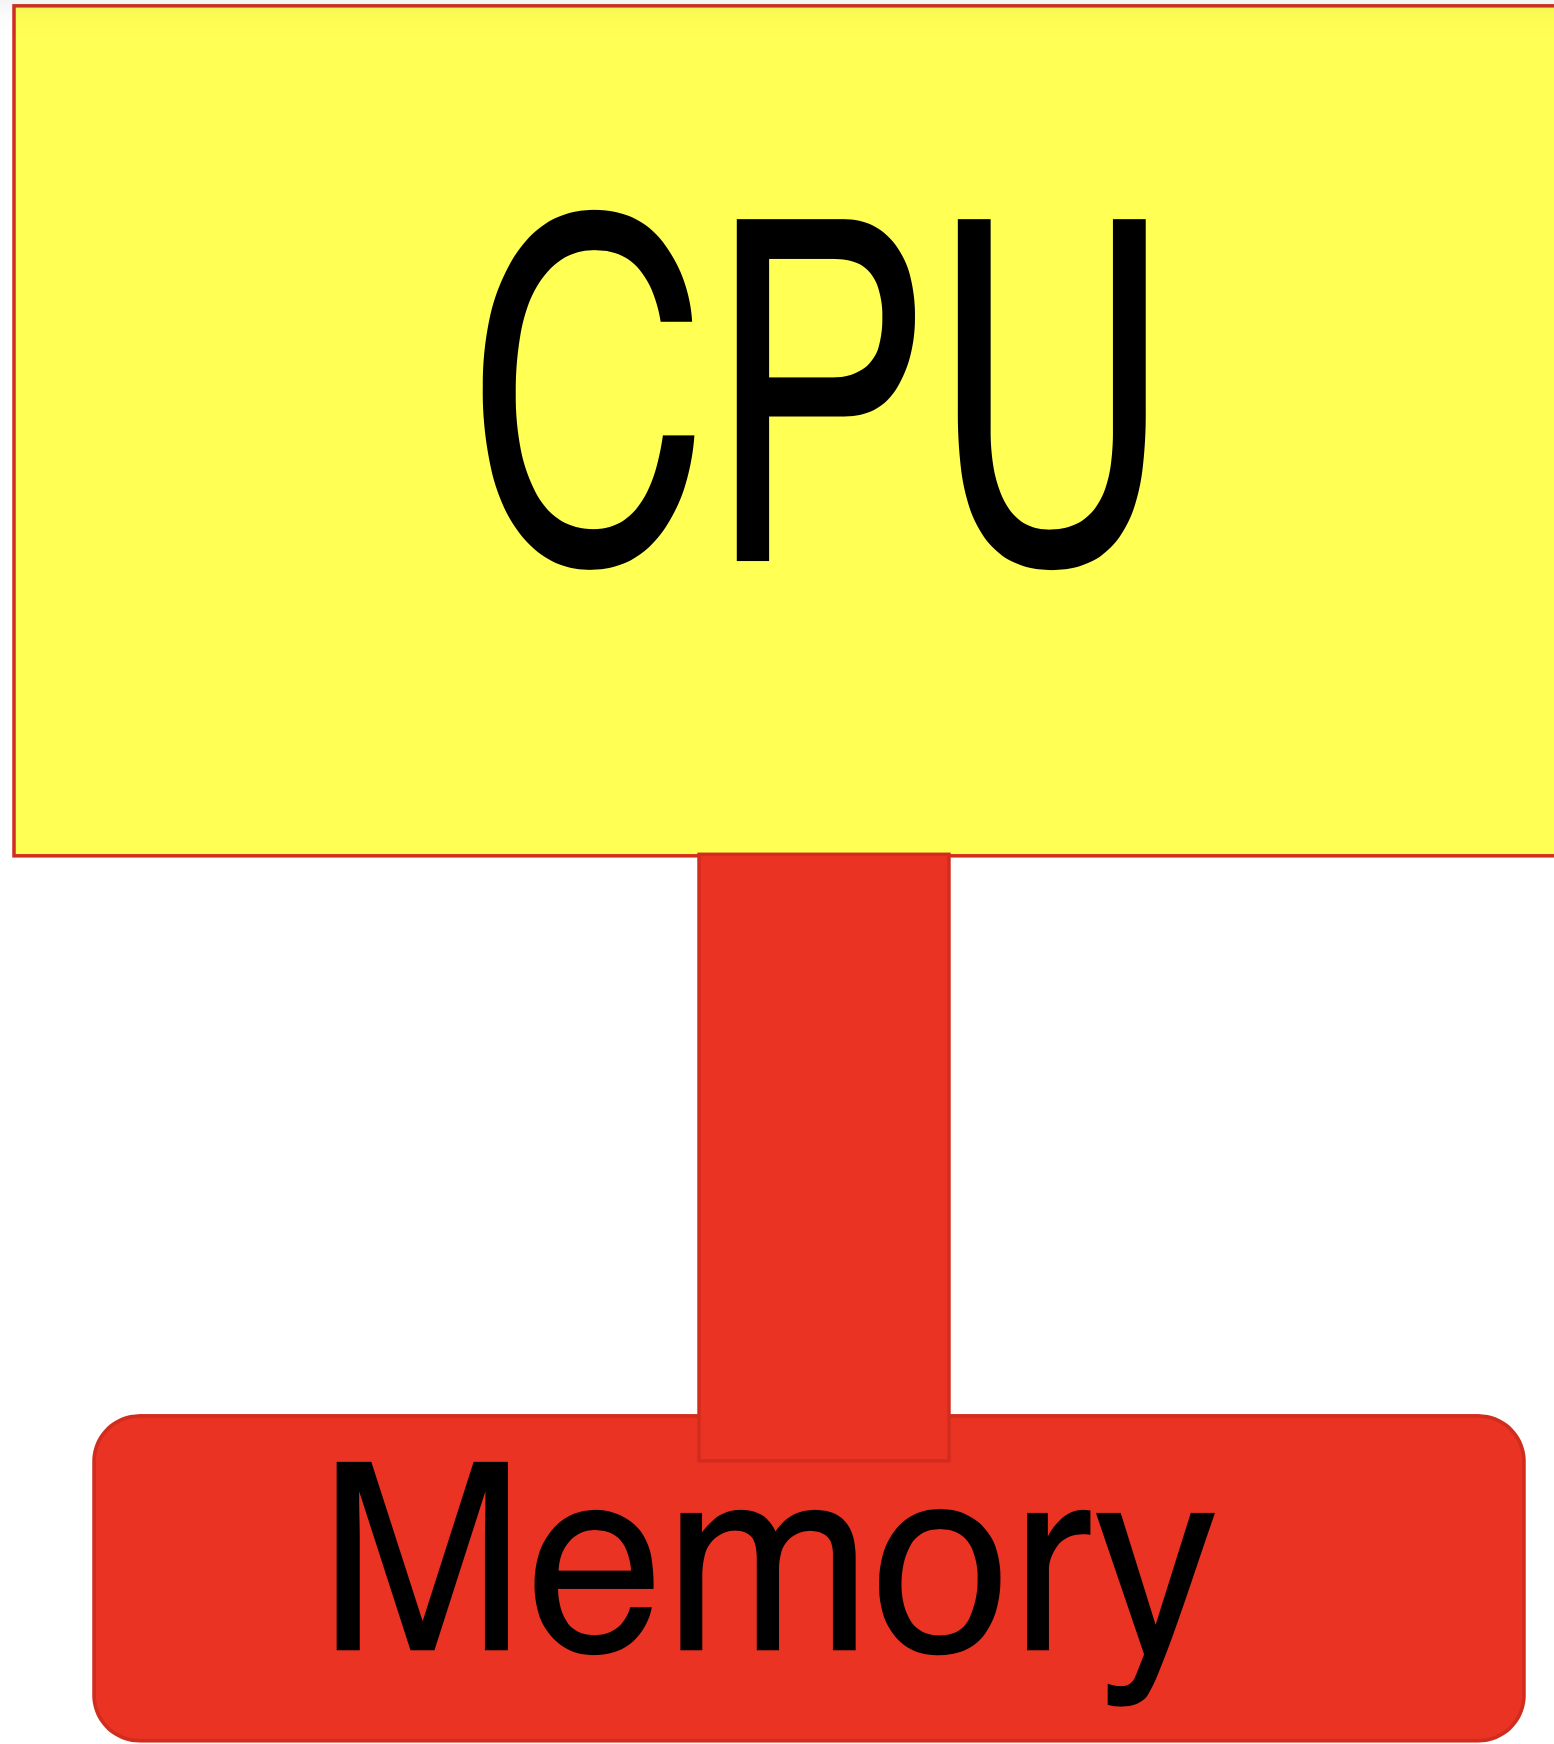

# a Cache can speed things up dramatically if there is "locality of memory accesses"
- 

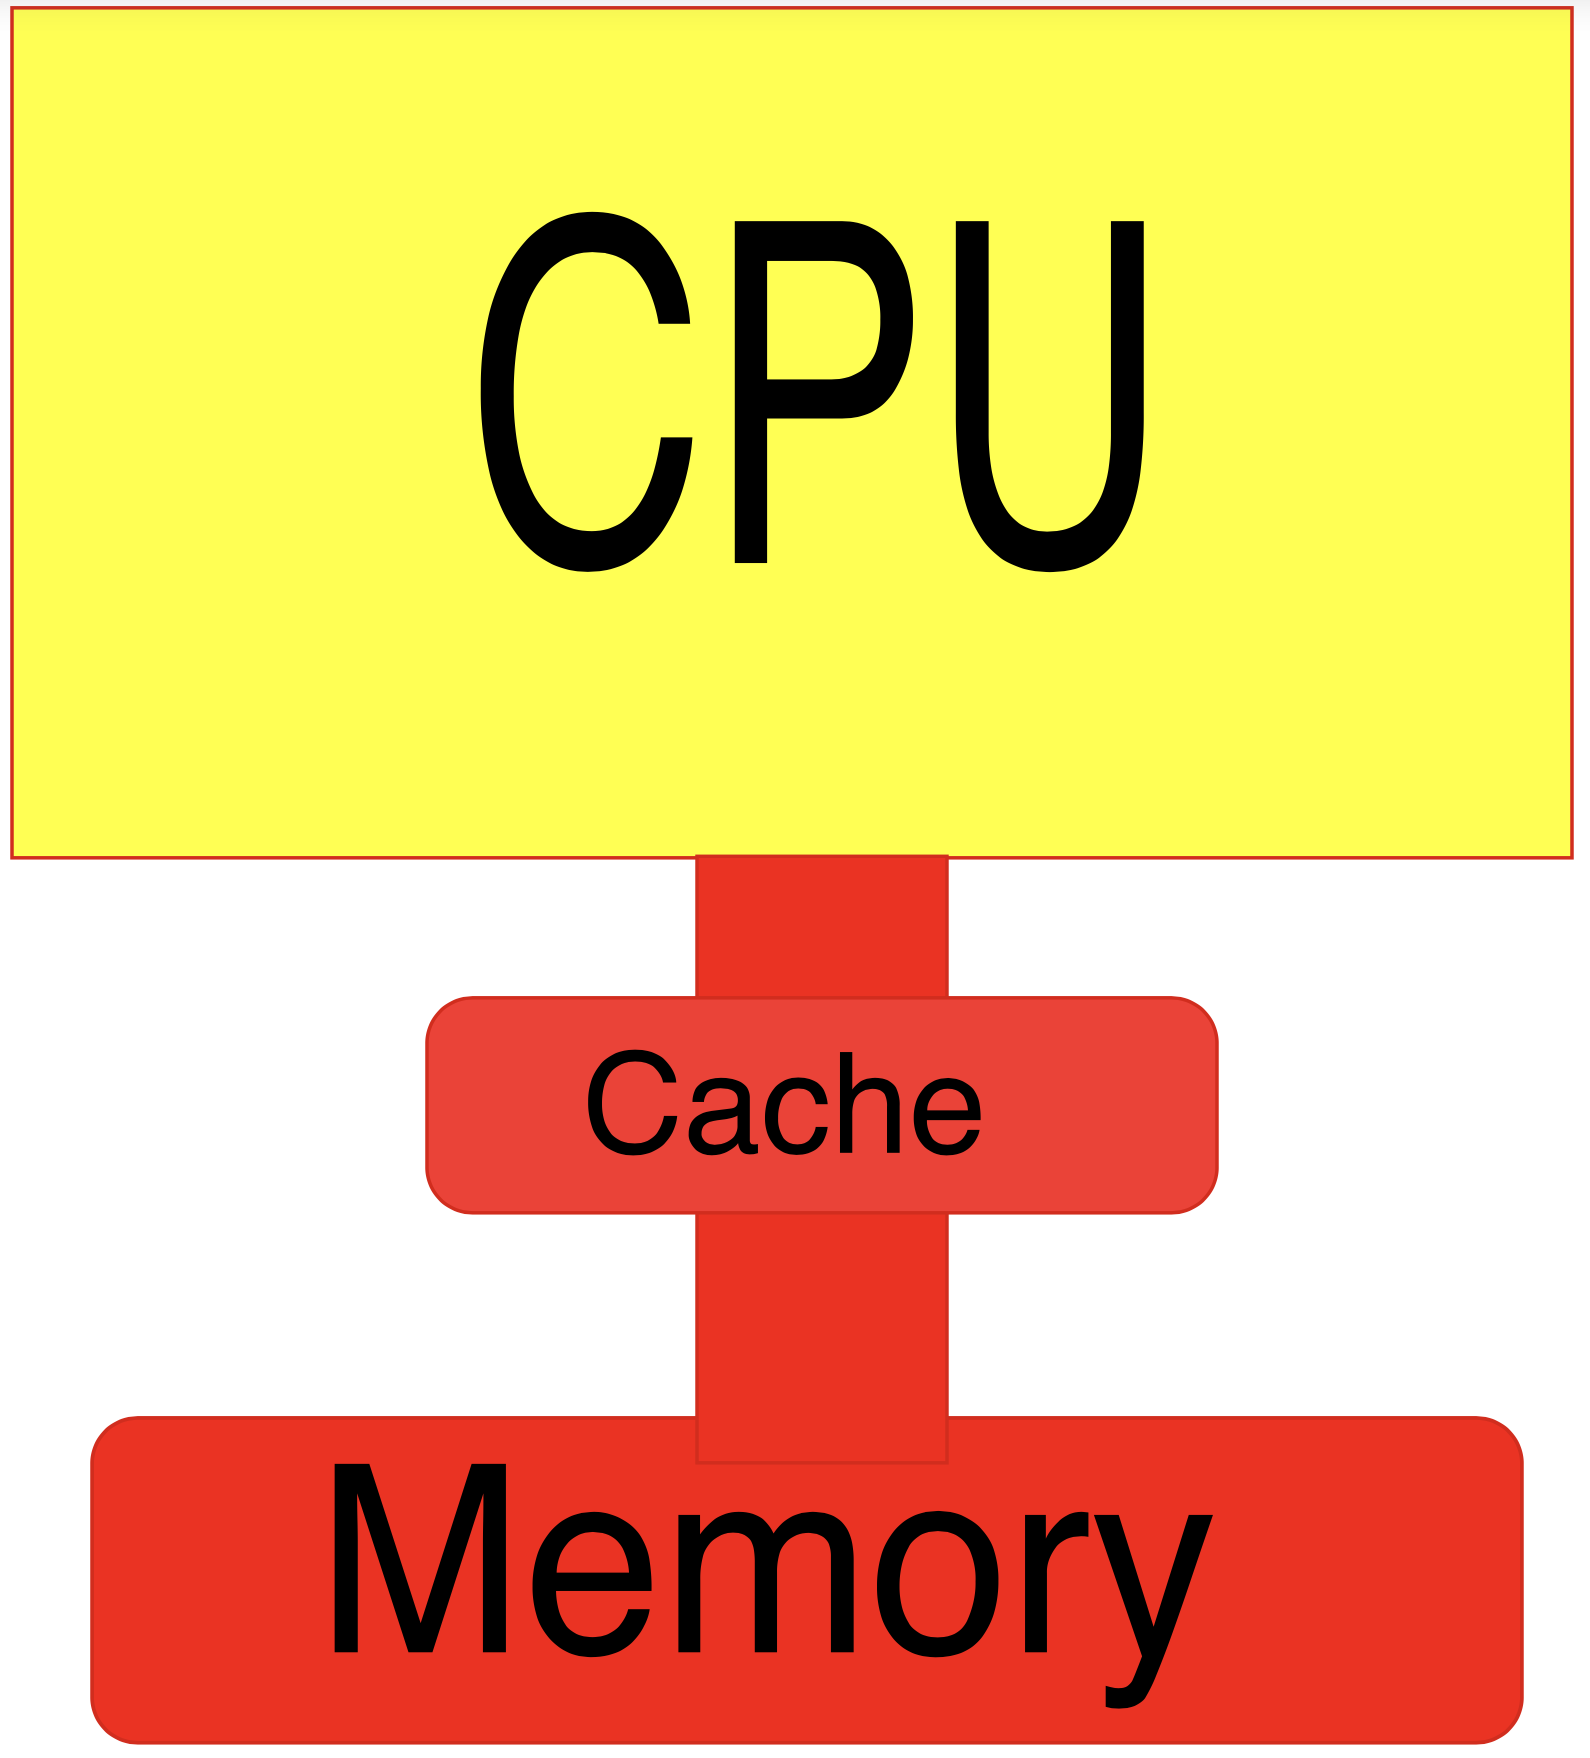

# Another issue - vector arithmetic
- unlike languages like Matlab, Mathematica and C++, Python does not provide
vector 'arithmetic', which is extremely useful in:
    - machine learning
    - statistics 
    - big data
    - parallel processing
    - science and engineering in general


In [5]:
# concatenates
# i expected [5,7,9]

[1,2,3]+[4,5,6]

[1, 2, 3, 4, 5, 6]

In [7]:
# this doesn't work at all,
# i expected [4,10,18]

[1,2,3]*[4,5,6]

TypeError: can't multiply sequence by non-int of type 'list'

In [6]:
# i expected to get [3,6,9]

[1,2,3]*3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [4]:
# this doesn't work either
# i expected to get back a 
# list of sin evals

import math

math.sin([1.,2.,3.])

TypeError: must be real number, not list

# Python problems
- interpreter is slow compared with compiled code
- Memory
    - bloat
    - no contiguous arrays - poor utilization of cache
    - lists take extra memory
- no vector arithmetic